In [206]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import PowerTransformer 
from sklearn.metrics import r2_score
from scipy import stats

from pandas import DataFrame

from sklearn.linear_model import LinearRegression

In [207]:
df= pd.read_csv("Concrete Compressive Strength.csv")

In [208]:
df.drop('Fly Ash', axis=1, inplace= True)
df

,Cement,Blast Furnace Slag,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,175.6,11.3,989.6,788.9,28,32.768036


In [209]:
for col in df.columns:
    df[col].replace(to_replace = 0, value =  df[col].mean(), inplace=True)


df.describe()


,Cement,Blast Furnace Slag,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,107.327812,181.566359,8.485616,972.918592,773.578883,45.662136,35.817836
std,104.507142,62.067529,21.355567,4.036747,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.020000,121.750000,1.720000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,73.895485,164.900000,6.203112,932.000000,730.950000,7.000000,23.707115
50%,272.900000,73.895485,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [210]:
y= df["Strength"]
X= df.drop("Strength", axis=1)


In [211]:
X_train, x_test, Y_train, y_test= train_test_split(X,Y, test_size=0.33, random_state=42)

In [212]:
lr= LinearRegression()
lr.fit(X_train,Y_train)

y_pred= lr.predict(x_test)

r2_score(y_test,y_pred)

0.5866622813440681

In [213]:
lr= LinearRegression()

np.mean(cross_val_score(lr, X, y, scoring='r2'))

0.4334873780533405

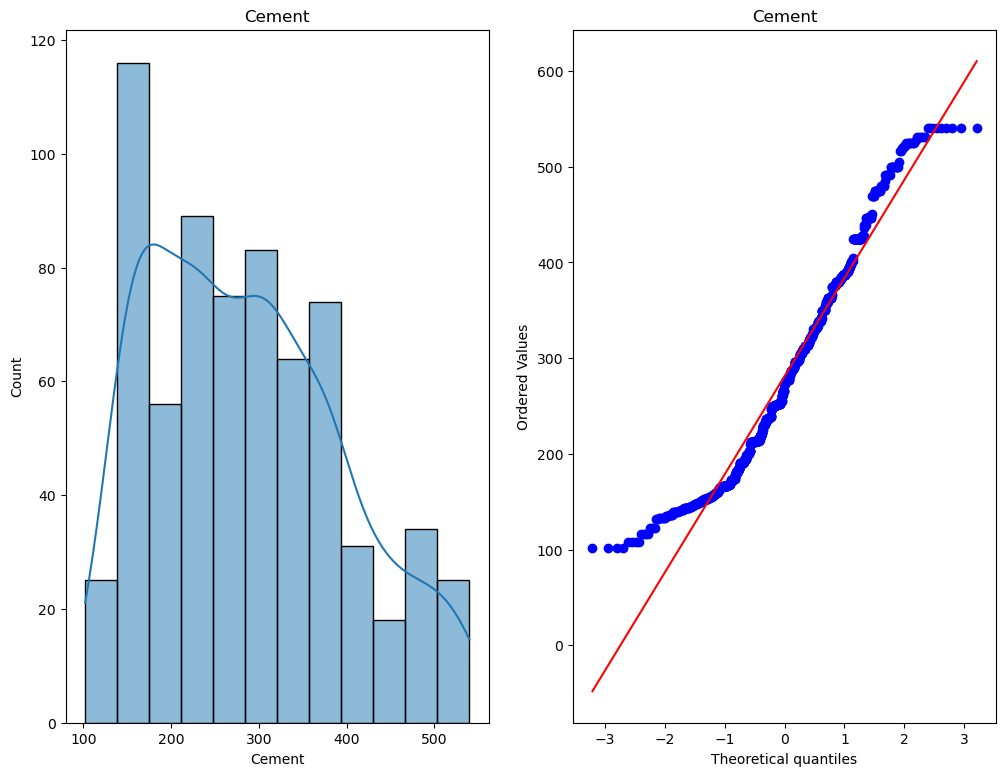

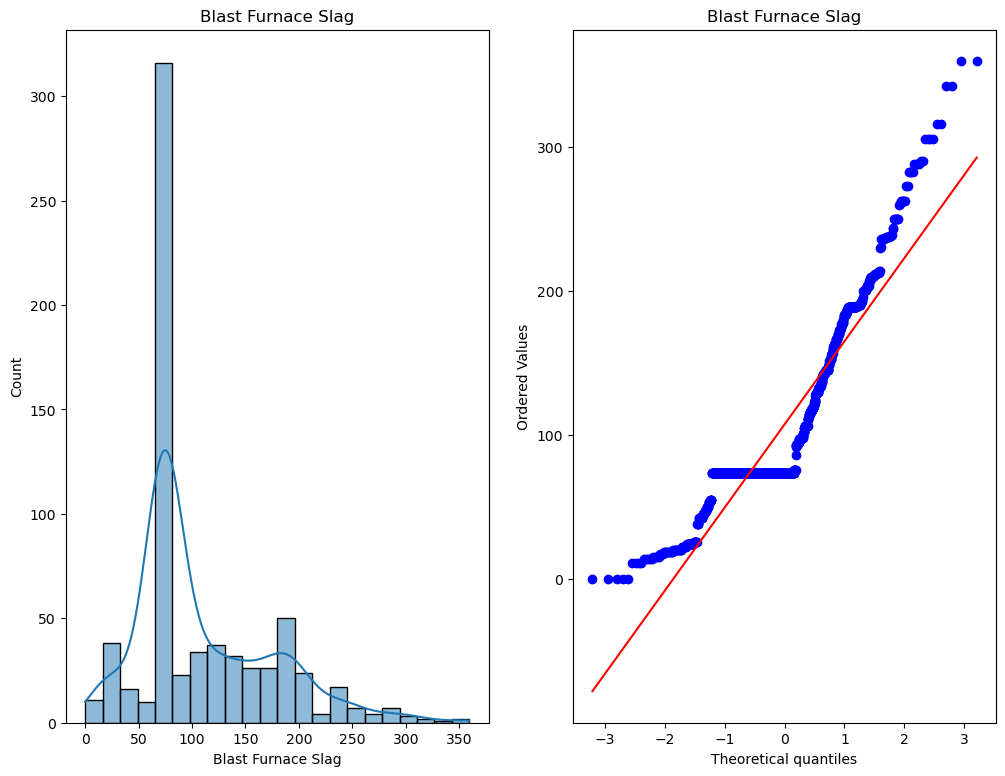

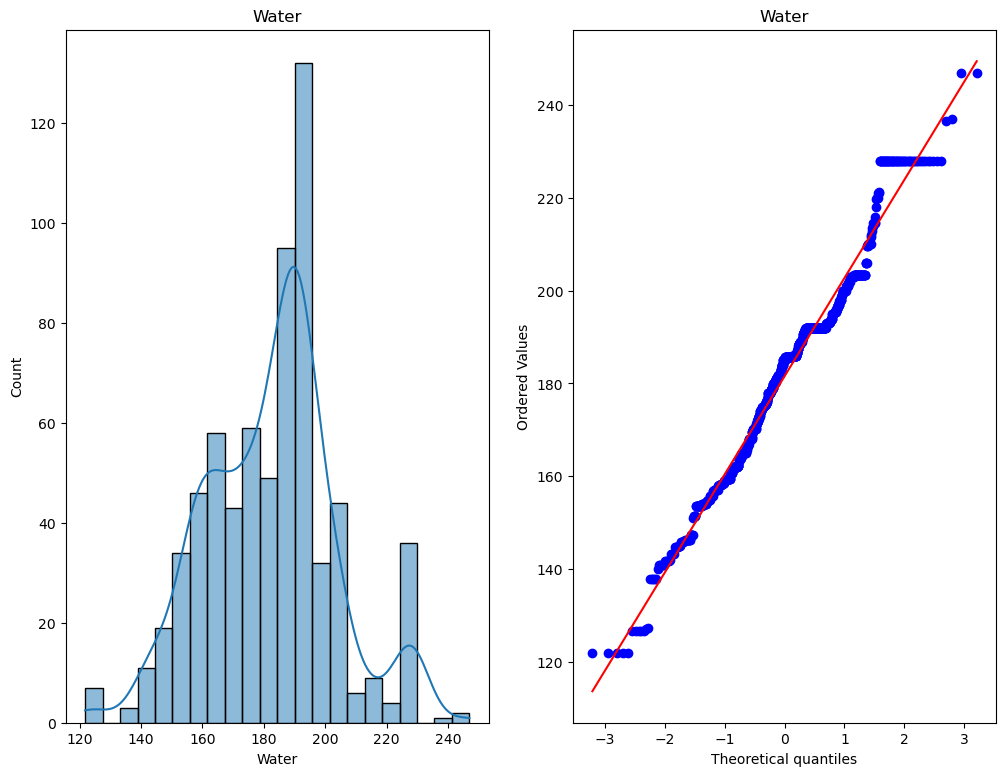

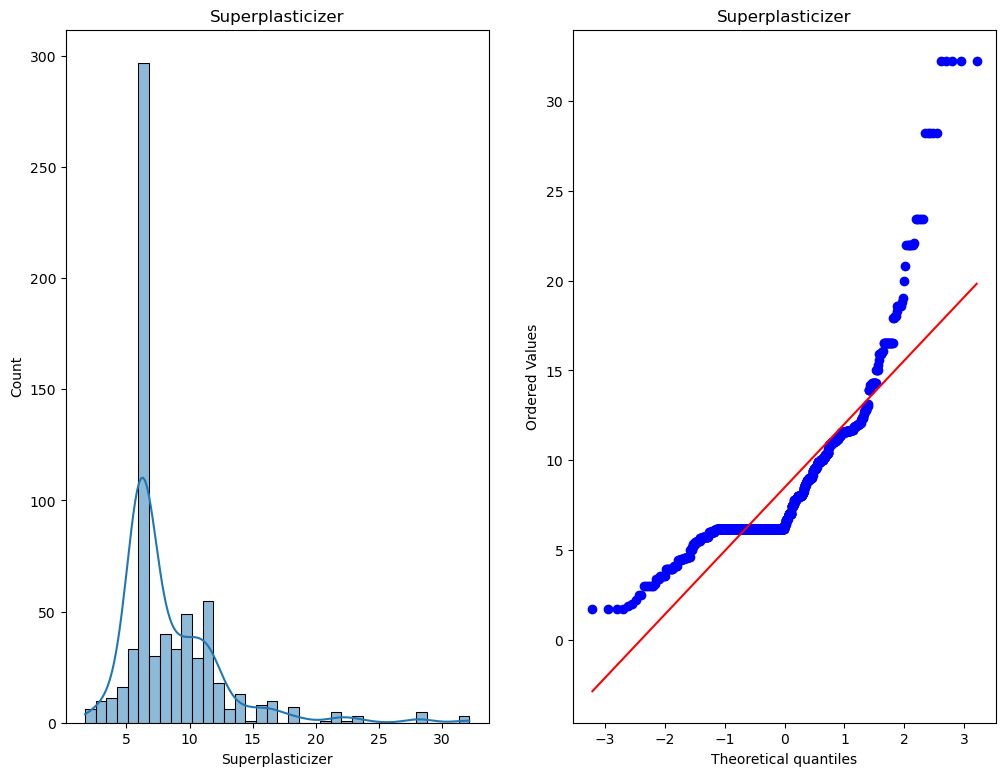

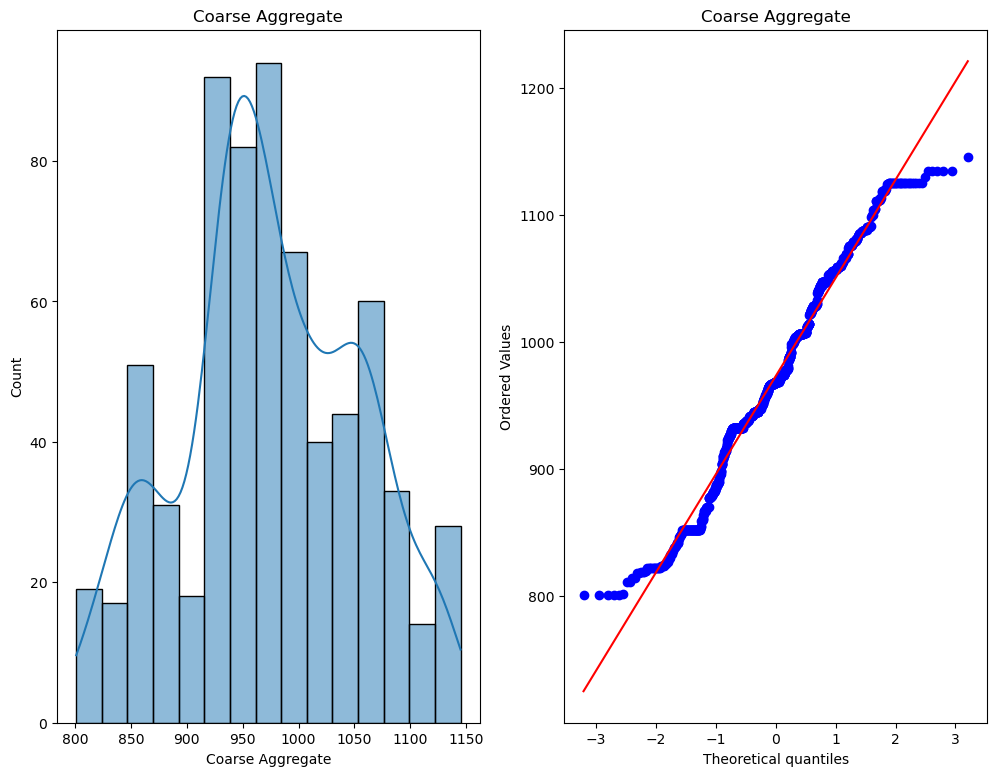

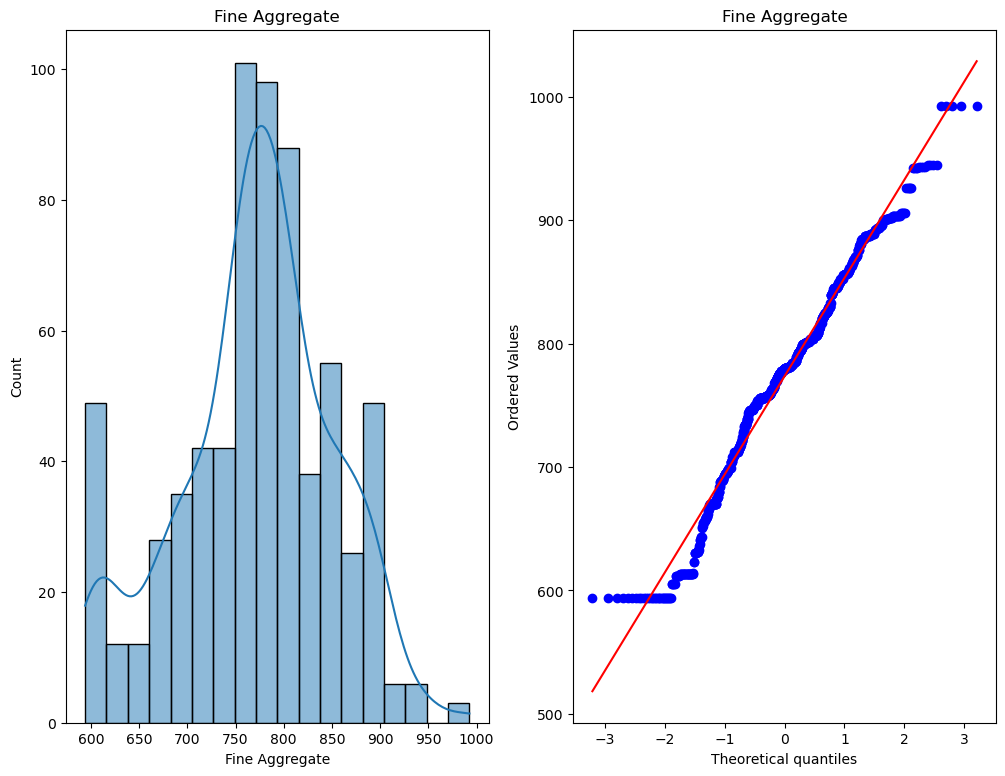

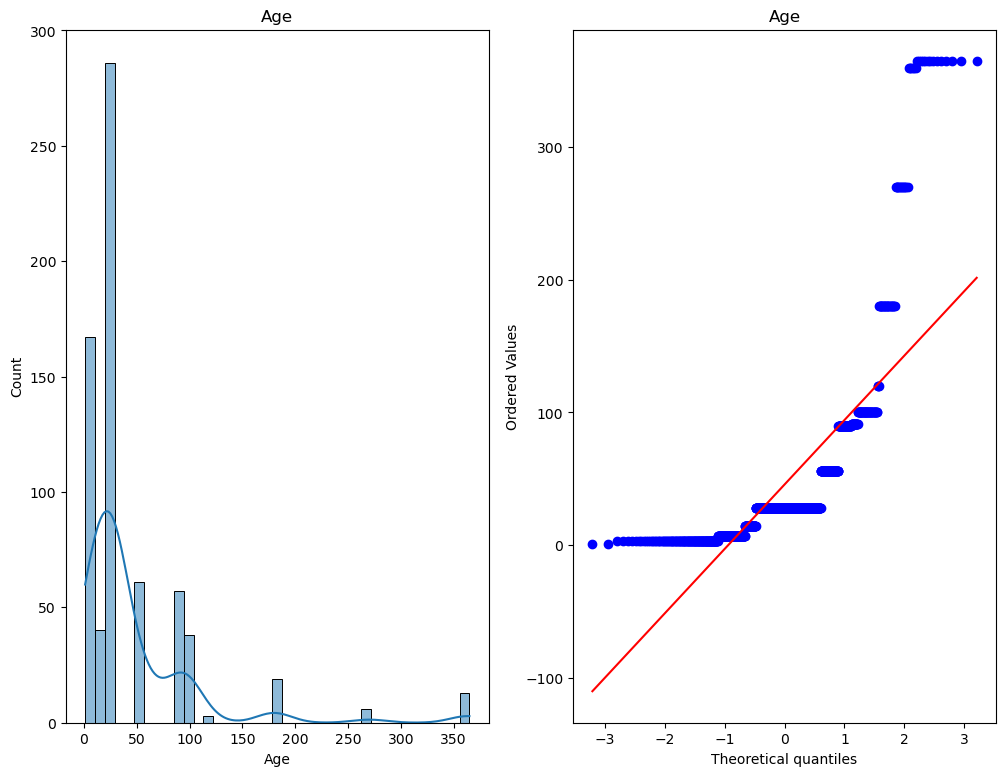

In [214]:


for col in X_train.columns:
    plt.figure(figsize=(12,9))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(df[col], plot=plt)
    plt.title(col)
    
    plt.show
    

In [215]:
boxcox= PowerTransformer(method='box-cox')
X_train_transformed= boxcox.fit_transform(X_train)
x_test_transform= boxcox.transform(x_test)


In [216]:
lr= LinearRegression()

lr.fit(X_train_transformed, Y_train)
y_pred2= lr.predict(x_test_transform)

r2_score(y_test, y_pred2)

0.7745940245679606

In [217]:
boxcox= PowerTransformer(method='box-cox')
X_transformed= boxcox.fit_transform(X)

lr= LinearRegression()

np.mean(cross_val_score(lr, X_transformed, y,scoring='r2'))

0.6316539973819718

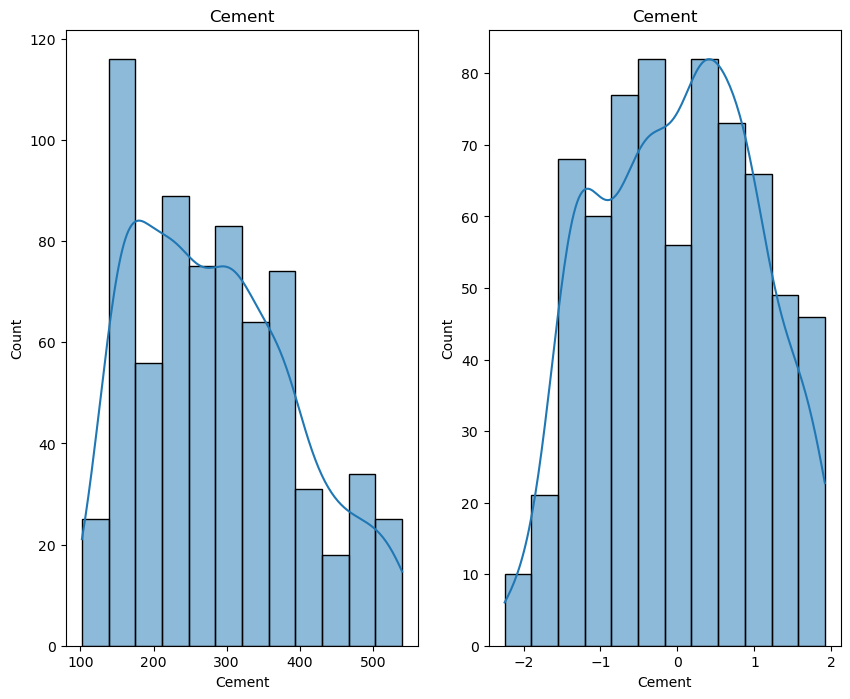

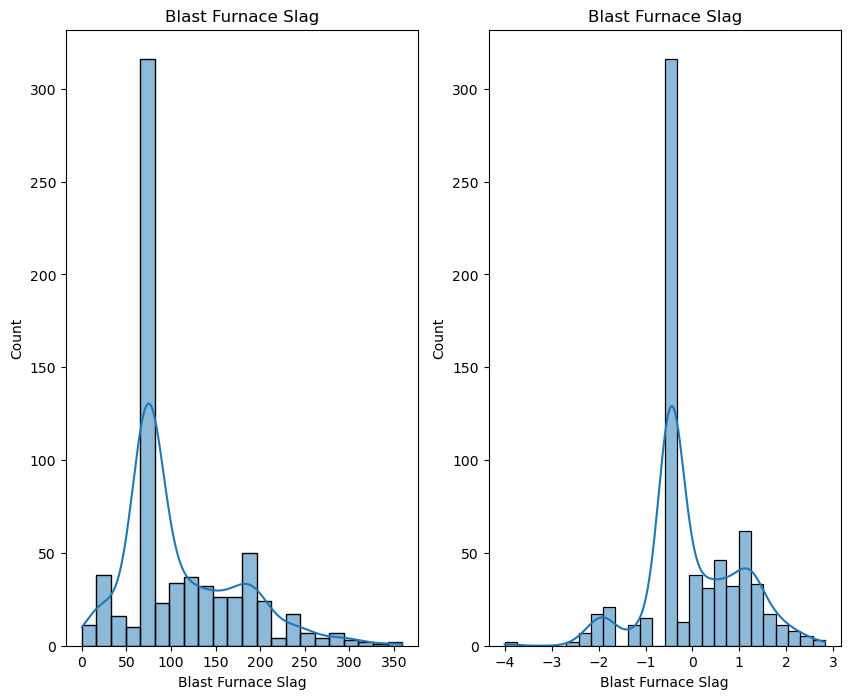

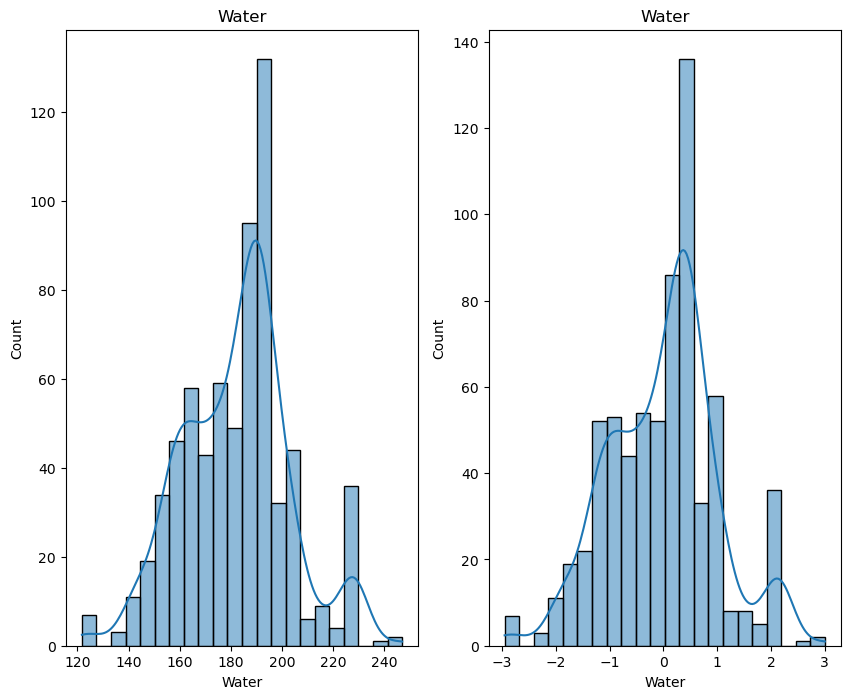

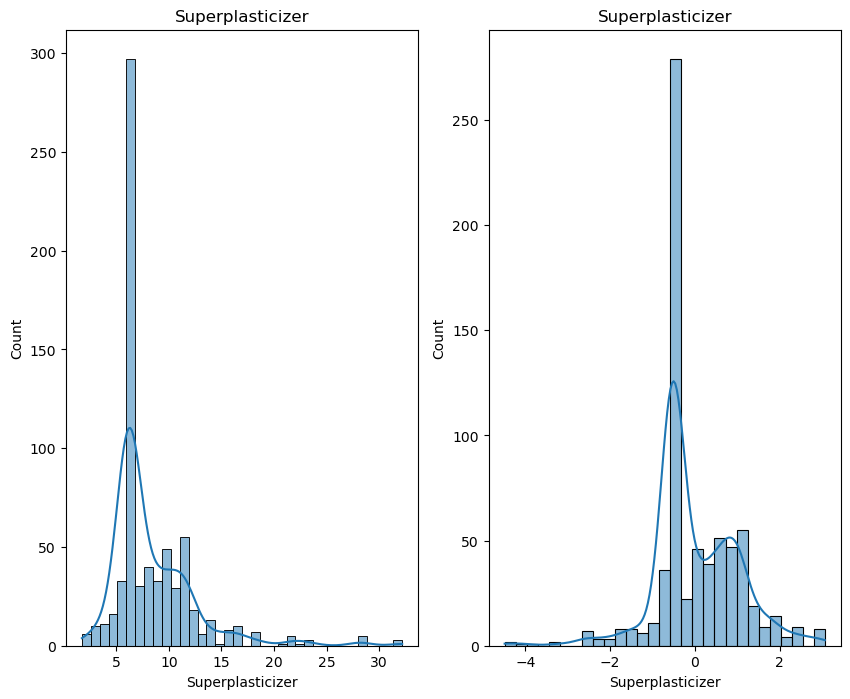

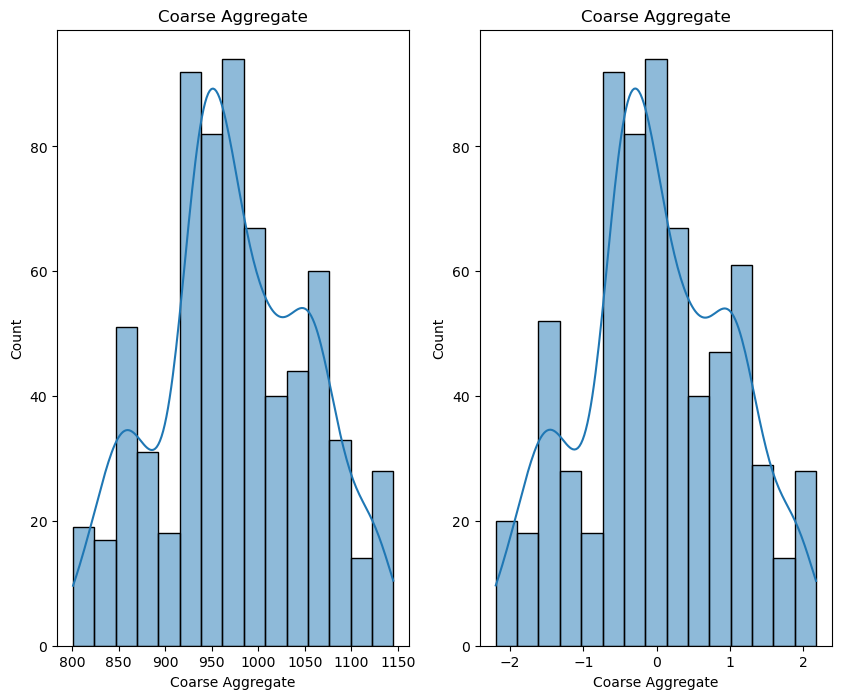

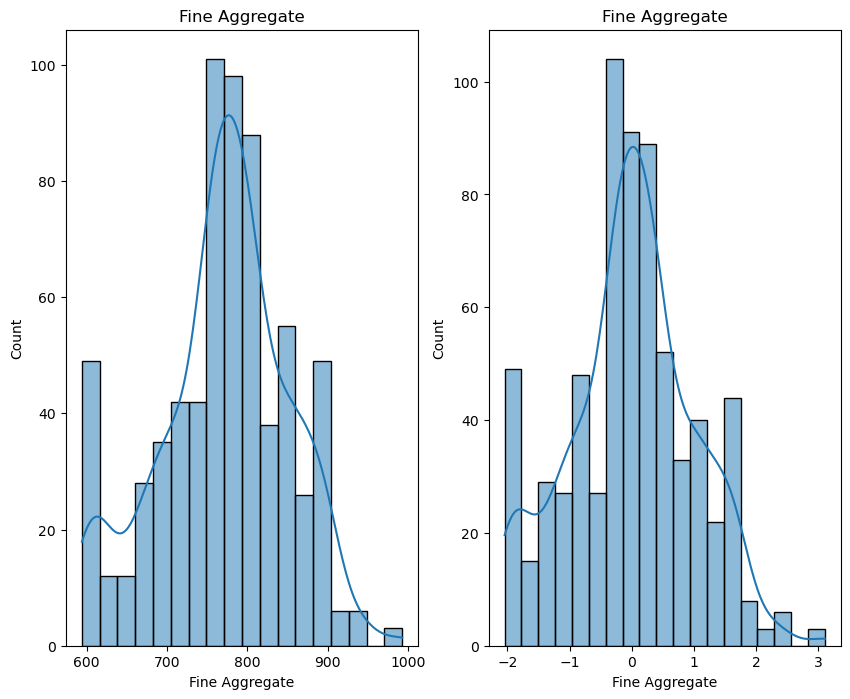

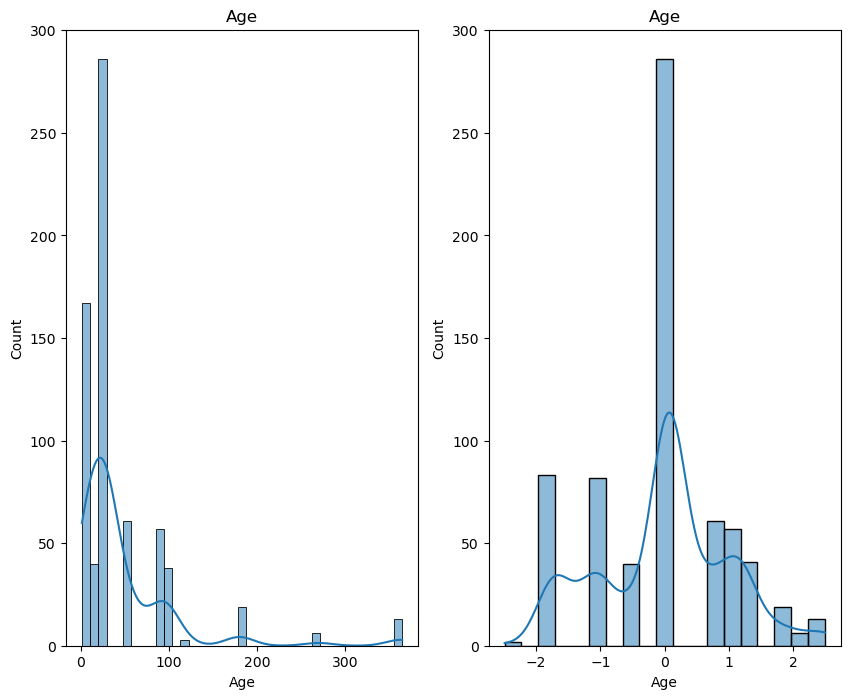

In [219]:
X_train_transformed= pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(10,8))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)
    
    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(col)
    
    plt.show
    

In [231]:
yj= PowerTransformer()

X_train_transformed2= yj.fit_transform(X_train)
x_test_transformed2=yj.transform(x_test)



In [232]:
lr= LinearRegression()

lr.fit(X_train_transformed2, Y_train)
y_pred3= lr.predict(x_test_transformed2)

r2_score(y_test, y_pred3)

0.7754773787492073

In [233]:
yj= PowerTransformer()
X_transformed2= yj.fit_transform(X)

lr= LinearRegression()

np.mean(cross_val_score(lr, X_transformed2, y,scoring='r2'))

0.6313513976467082